In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Height-Weight.csv')

In [3]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [5]:
df.columns

Index(['Height', 'Weight'], dtype='object')

In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


<AxesSubplot:xlabel='Height', ylabel='Weight'>

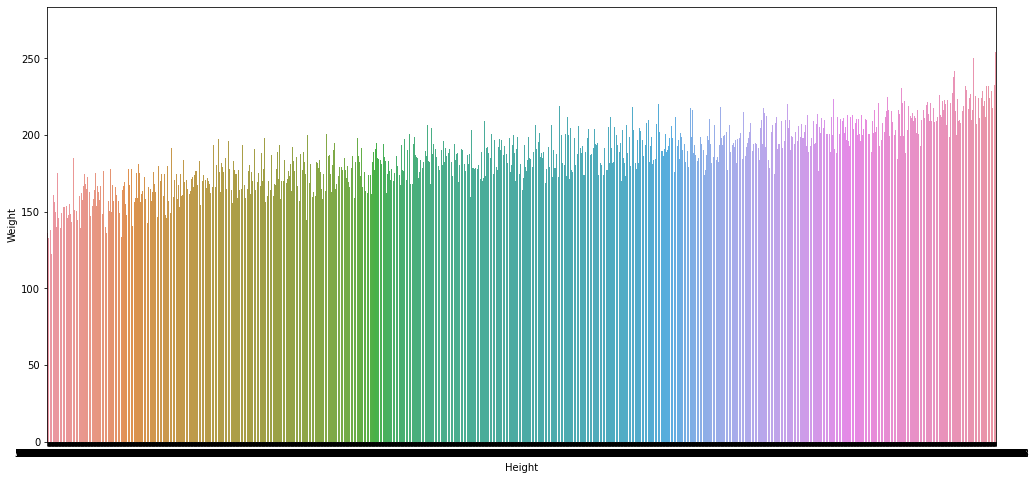

In [7]:
plt.figure(figsize=(17,8))
sns.barplot(x='Height',y='Weight',data=df)

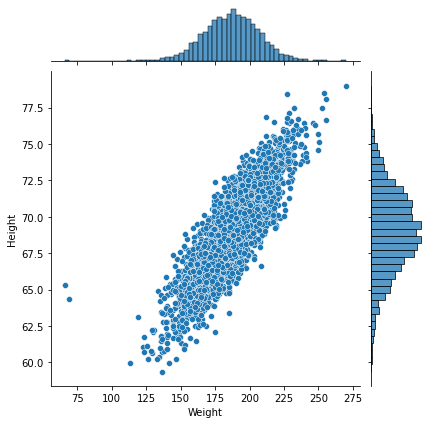

In [8]:
sns.jointplot(y='Height',x='Weight',data=df)

In [9]:
df.Height.mean()

69.02441087268797

In [10]:
df.Weight.mean()

186.89125797946284

In [11]:
x=df.drop(['Weight'],axis=1)
y=df['Weight']

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [14]:
xtrain

,Height
3246,69.575891
2118,63.992899
2583,67.174715
432,68.921041
1724,67.140186
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [15]:
ytrain.shape

(2800,)

In [16]:
xtrain.shape

(2800, 1)

In [17]:
Reg=LinearRegression()
Reg.fit(xtrain,ytrain)
Reg.score(xtest,ytest)

0.7437517146778504

In [18]:
Reg.score(xtest,ytest)

0.7437517146778504

In [19]:
Reg.score(xtrain,ytrain)

0.729271763964062

In [20]:
Reg.fit(x,y)
Reg.score(x,y)

0.7323584758139253

In [21]:
Reg.fit(x,y)
print(Reg.score(xtest,ytest))
print(Reg.score(xtrain,ytrain))
print(Reg.score(x,y))

0.7441006253303133
0.7292308829532115
0.7323584758139253


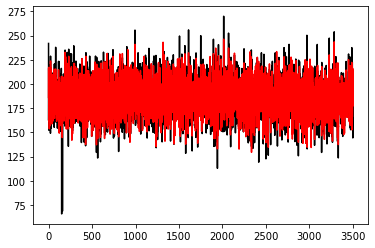

In [22]:
plt.plot(df['Weight'],color='black')
plt.plot(Reg.predict(x),color='red')

In [23]:
m=Reg.coef_
m

array([5.95843786])

In [24]:
c=Reg.intercept_
c

-224.38640537131263

In [25]:
x=69.0 #mean value of X
y= m*x + c
y

array([186.74580731])

In [26]:
ypredict=Reg.predict(xtest)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypredict)


105.87244222886949

In [28]:
from sklearn.metrics import r2_score
r2_score(ytest,ypredict)


0.7441006253303133

In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypredict)

8.329502960032137

# y=mx+c